### Exploratory Data Analysis on US_Lightning_Forest_Fires data from Kaggle


In [100]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Load Dataset 
df = pd.read_csv('US_Lightning_Forest_Fires.csv')

In [104]:
df.head(5)

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [108]:
df = df.drop(['Unnamed: 0', 'index','STAT_CAUSE_DESCR','FIPS_CODE','FIPS_NAME'],axis=1)

In [110]:
df

,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,2004,05-12-2004,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA
1,2004,06-28-2004,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA
2,2004,06-28-2004,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA
3,2004,06-30-2004,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA
4,2004,07-01-2004,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA
...,...,...,...,...,...,...,...,...,...,...
278463,2010,07-26-2010,1444.0,1.0,1351.0,81.00,C,41.508867,-120.819167,CA
278464,2010,07-27-2010,1817.0,NaN,NaN,1.00,B,41.684917,-122.716183,CA
278465,2015,08-06-2015,1204.0,0.0,1935.0,0.50,B,39.655817,-121.234567,CA
278466,2015,06-26-2015,1752.0,0.0,2014.0,0.05,A,40.443000,-120.664433,CA


In [112]:
df.shape

(278468, 10)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278468 entries, 0 to 278467
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FIRE_YEAR                278468 non-null  int64  
 1   Fire_Date                278468 non-null  object 
 2   DISCOVERY_TIME           228272 non-null  float64
 3   Days_to_extinguish_fire  227876 non-null  float64
 4   CONT_TIME                220068 non-null  float64
 5   FIRE_SIZE                278468 non-null  float64
 6   FIRE_SIZE_CLASS          278468 non-null  object 
 7   LATITUDE                 278468 non-null  float64
 8   LONGITUDE                278468 non-null  float64
 9   STATE                    278468 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 21.2+ MB


In [116]:
df.describe()

,FIRE_YEAR,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE
count,278468.000000,228272.000000,227876.000000,220068.000000,278468.000000,278468.000000,278468.000000
mean,2003.264210,1454.013344,2.918978,1548.339354,312.543994,39.403305,-108.226305
std,6.642187,397.503497,11.453925,438.388579,5759.149479,6.425141,14.320107
min,1992.000000,0.000000,-210.000000,0.000000,0.000100,17.980278,-170.369400
25%,1998.000000,1210.000000,0.000000,1242.000000,0.100000,34.633300,-117.578143
50%,2003.000000,1510.000000,0.000000,1608.000000,0.200000,39.491600,-111.470000
75%,2009.000000,1730.000000,1.000000,1835.000000,2.000000,44.033070,-105.056100
max,2015.000000,2359.000000,278.000000,2359.000000,606945.000000,70.138100,-67.158333


In [118]:
# Missing Values 
missing_values = df.isnull().sum()
missing_values

FIRE_YEAR                      0
Fire_Date                      0
DISCOVERY_TIME             50196
Days_to_extinguish_fire    50592
CONT_TIME                  58400
FIRE_SIZE                      0
FIRE_SIZE_CLASS                0
LATITUDE                       0
LONGITUDE                      0
STATE                          0
dtype: int64

## 1. HeatMap Missing Value 

Text(0.5, 1.0, 'Missing Values HeatMap')

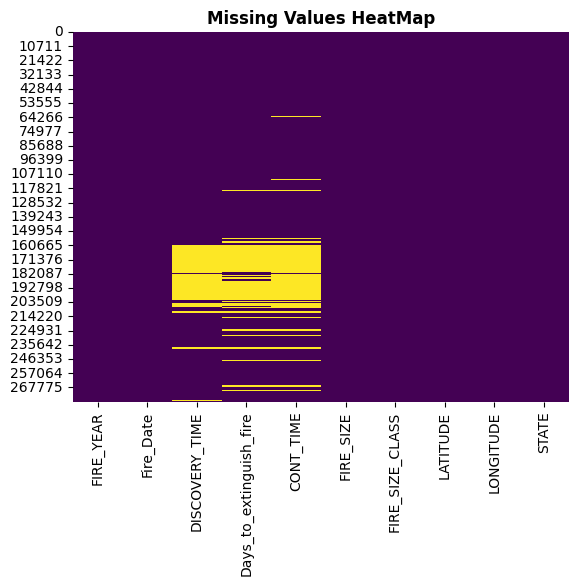

In [121]:
sns.heatmap(df.isnull(), cbar = False, cmap ='viridis')
plt.title("Missing Values HeatMap", fontweight='bold')


## 2. Histogram Plot 

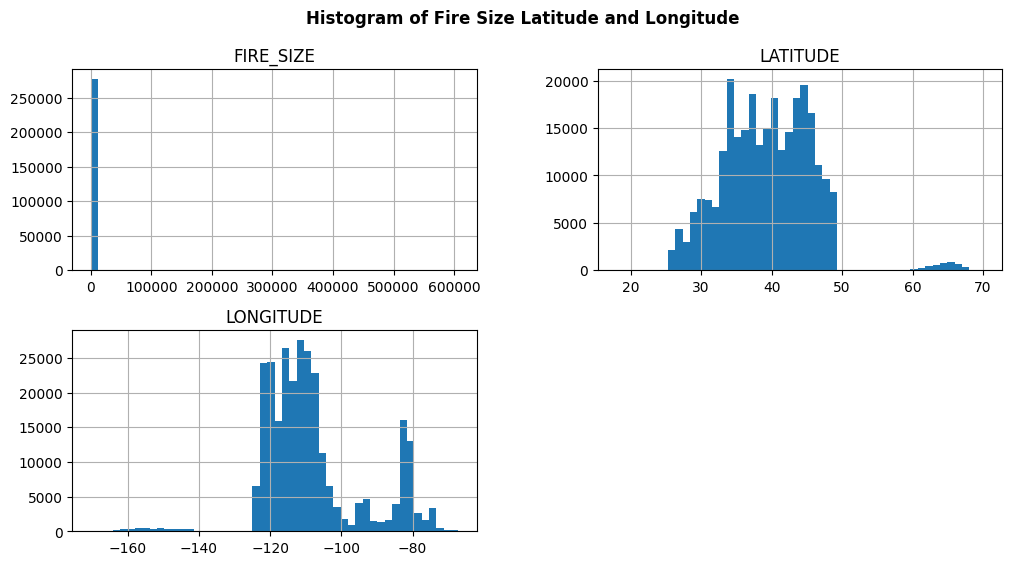

In [139]:
df[['FIRE_SIZE','LATITUDE','LONGITUDE']].hist(bins=50, figsize=(12,6))
plt.suptitle("Histogram of Fire Size Latitude and Longitude", fontweight='bold')
plt.show()

## 3. BOX PLOTS - Outliers

Text(0.5, 1.0, 'Fire Size by Size Class')

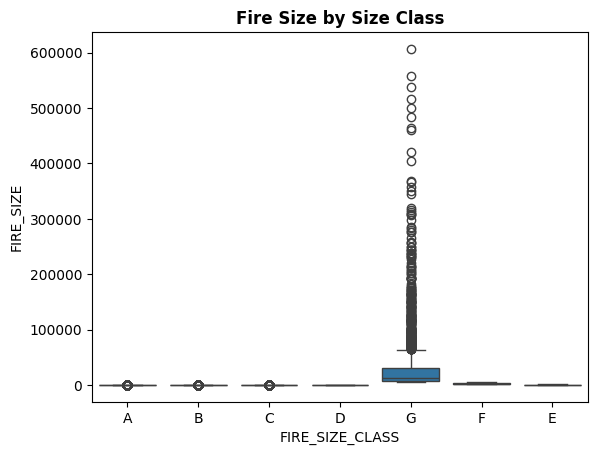

In [141]:
sns.boxplot(x='FIRE_SIZE_CLASS', y= 'FIRE_SIZE', data = df)
plt.title("Fire Size by Size Class", fontweight='bold')


## 4. Patterns 

Text(0.5, 1.0, 'Yearly Variations in Fire Size')

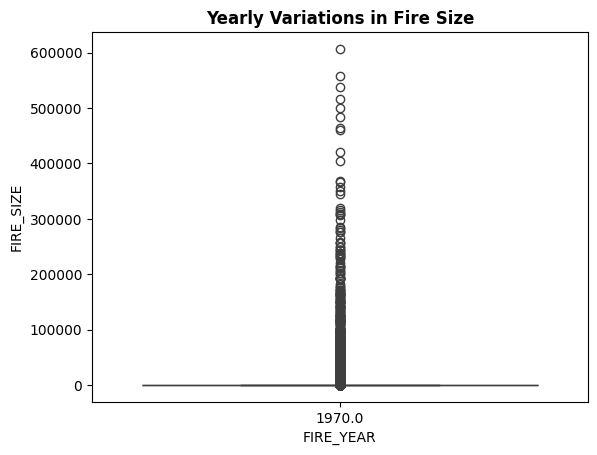

In [143]:
df['DISCOVERY_TIME'] = pd.to_datetime(df['DISCOVERY_TIME'])
df['FIRE_YEAR']= df['DISCOVERY_TIME'].dt.year
sns.boxplot(x='FIRE_YEAR',y='FIRE_SIZE',data = df)
plt.title("Yearly Variations in Fire Size", fontweight ='bold')

## 5. Correlation HeatMap

Text(0.5, 1.0, 'Correlation Between Numeric Variables')

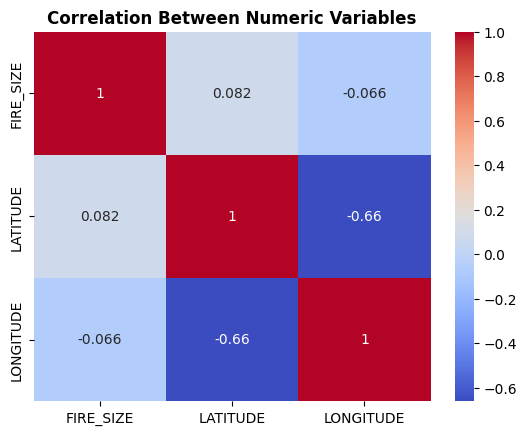

In [145]:
numeric = ['FIRE_SIZE', 'LATITUDE', 'LONGITUDE']
corr = df[numeric].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Variables", fontweight='bold')

## 6. Bar Chart

Text(0, 0.5, 'Days')

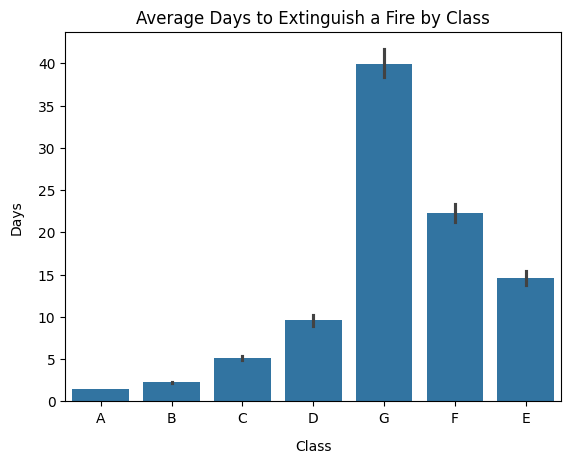

In [147]:
plt.title ("Average Days to Extinguish a Fire by Class",)
sns.barplot(x = 'FIRE_SIZE_CLASS', y = 'Days_to_extinguish_fire', data = df)
plt.xlabel("Class", fontsize=10, labelpad=10)
plt.ylabel("Days", fontsize=10, labelpad=10)

## 7. Scatter Plot

Text(0.5, 1.0, 'Fire Size vs. Total Number of Days to Extinguish')

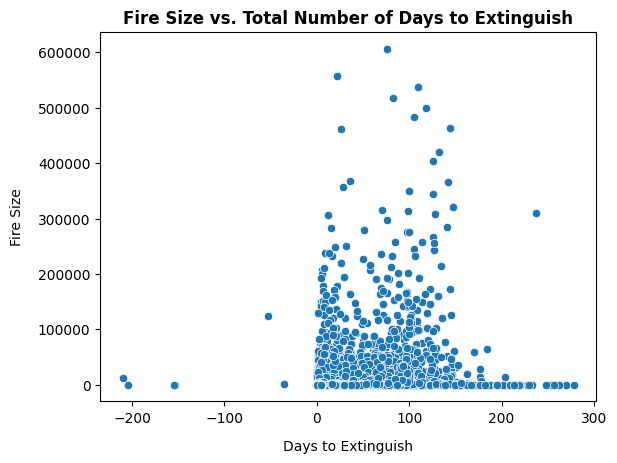

In [149]:
sns.scatterplot(x='Days_to_extinguish_fire', y='FIRE_SIZE', data = df)
plt.xlabel("Days to Extinguish", fontsize=10, labelpad=10)
plt.ylabel("Fire Size", fontsize=10, labelpad=10)
plt.title ("Fire Size vs. Total Number of Days to Extinguish", fontweight='bold')
